In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

# 1. Load Data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(np.int8)

# Only select digits 0 and 1
mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]
print(X.shape, y.shape)

# 2. PCA Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 4. Train Model
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)



c:\Users\Acer\miniconda3\envs\pj\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(14780, 784) (14780,)


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

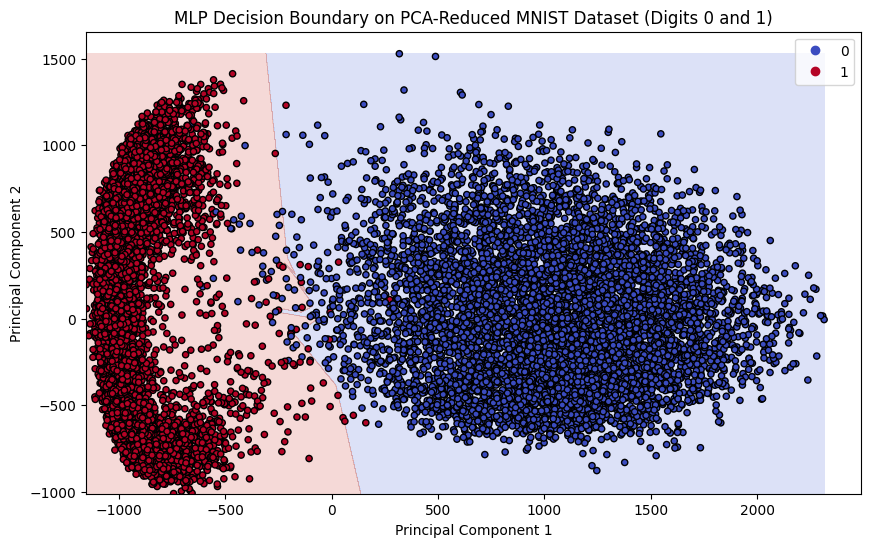

In [7]:
# 5. Visualize
# Define the mesh grid for plotting decision boundary
h = 2  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on mesh grid
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.2,cmap=plt.cm.coolwarm)

# Plot the scatter plot
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', s=20, cmap=plt.cm.coolwarm)
# plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='blue', label='number 0', edgecolors='k')
# plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='red', label='number 1', edgecolors='k')
# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MLP Decision Boundary on PCA-Reduced MNIST Dataset (Digits 0 and 1)')
plt.legend(handles=scatter.legend_elements()[0], labels=['0', '1'])
plt.show()
